# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [31]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [32]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [33]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [34]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [35]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [36]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [37]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [38]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [39]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [40]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [41]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [42]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [43]:
P = H[0:2, 3]

In [44]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2,):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## Ejemplo de manipulación del brazo robotico en su estado final

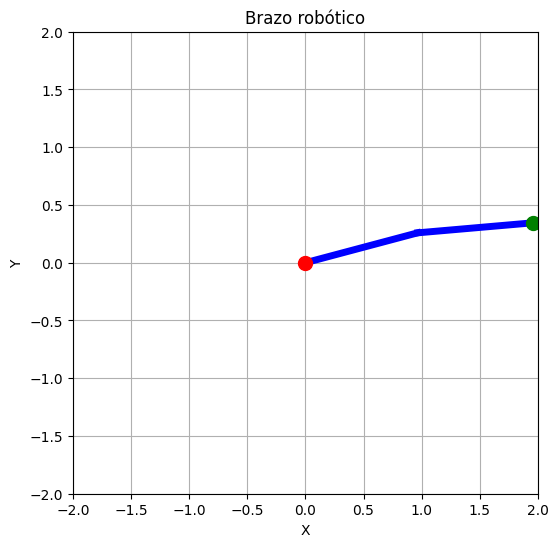

In [46]:
theta1 = np.deg2rad(15)  # 45 grados
theta2 = np.deg2rad(-10)  # -30 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2,)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

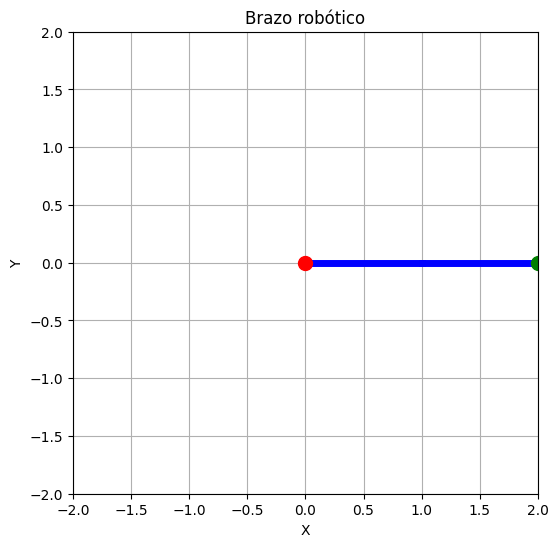

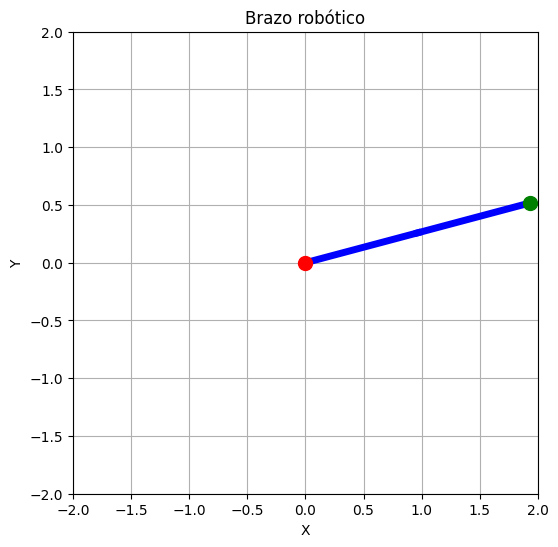

In [47]:
theta1 = np.deg2rad(0)  #
theta2 = np.deg2rad(0)  #
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2,)

theta1 = np.deg2rad(15)  #
theta2 = np.deg2rad(0)  #
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2,)

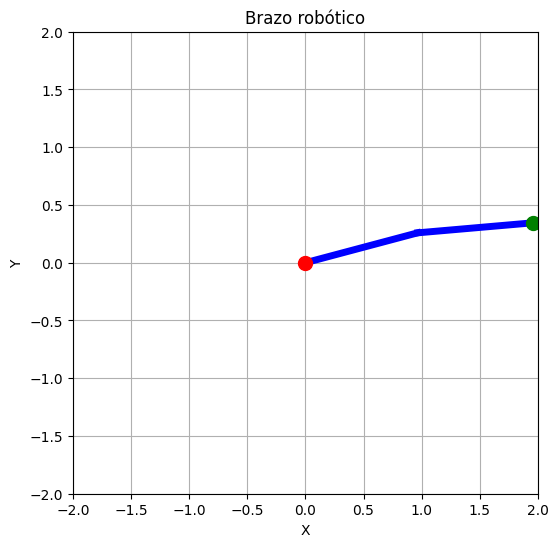

In [48]:
theta1 = np.deg2rad(15)  #
theta2 = np.deg2rad(-10)  #
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2,)

# **Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento**

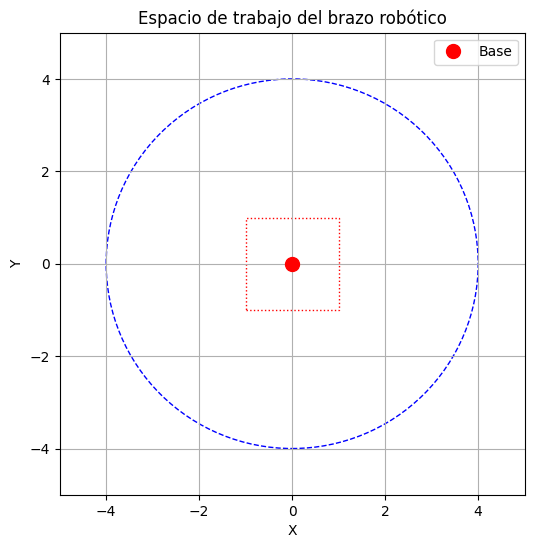

In [49]:
# Longitudes de los segmentos del brazo
"""
Define las longitudes de los segmentos del brazo robótico.
Estas son las entradas principales para calcular el espacio de trabajo.
"""
l1 = 2
l2 = 2

# Crear el lienzo para la visualización
"""
Crea una figura y ejes para la visualización del espacio de trabajo.
Se ajusta el tamaño de la figura para garantizar una vista clara.
"""
fig, ax = plt.subplots(figsize=(6,6))

# Dibujar círculo que representa el espacio de trabajo alcanzable
"""
Dibuja un círculo centrado en el origen que representa el espacio de trabajo alcanzable
por el brazo robótico basado en las longitudes de los segmentos.
"""
circle = plt.Circle((0, 0), l1 + l2, color='b', fill=False, linestyle='dashed')
ax.add_patch(circle)

# Dibujar la cuadrícula de 2x2
"""
Dibuja una cuadrícula de referencia centrada en el origen para ayudar a interpretar
la posición relativa en el espacio de trabajo.
"""
square = plt.Rectangle((-1, -1), 2, 2, color='r', fill=False, linestyle='dotted')
ax.add_patch(square)

# Configurar los límites del gráfico
"""
Establece los límites del gráfico según el tamaño del espacio de trabajo.
También define etiquetas y un título para la visualización.
"""
ax.set_xlim(-l1 - l2 - 1, l1 + l2 + 1)
ax.set_ylim(-l1 - l2 - 1, l1 + l2 + 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Espacio de trabajo del brazo robótico")
ax.grid(True)

# Dibujar la base del brazo
"""
Marca la posición de la base del brazo robótico en el origen con un punto rojo.
"""
plt.plot(0, 0, 'ro', markersize=10, label='Base')
plt.legend()

# Mostrar el gráfico
"""
Muestra la visualización generada del espacio de trabajo del brazo robótico.
"""
plt.show()



Punto 1: (-0.25, 0.90)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 29.08°, θ₂ = 152.94°
Posición alcanzada: x2 = -0.25, y2 = 0.90


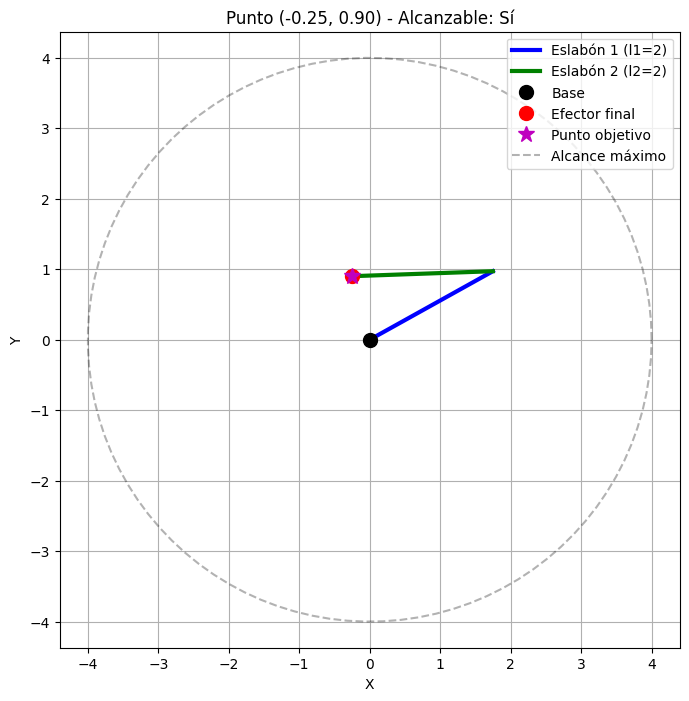


Punto 2: (0.46, 0.20)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -59.72°, θ₂ = 165.52°
Posición alcanzada: x2 = 0.46, y2 = 0.20


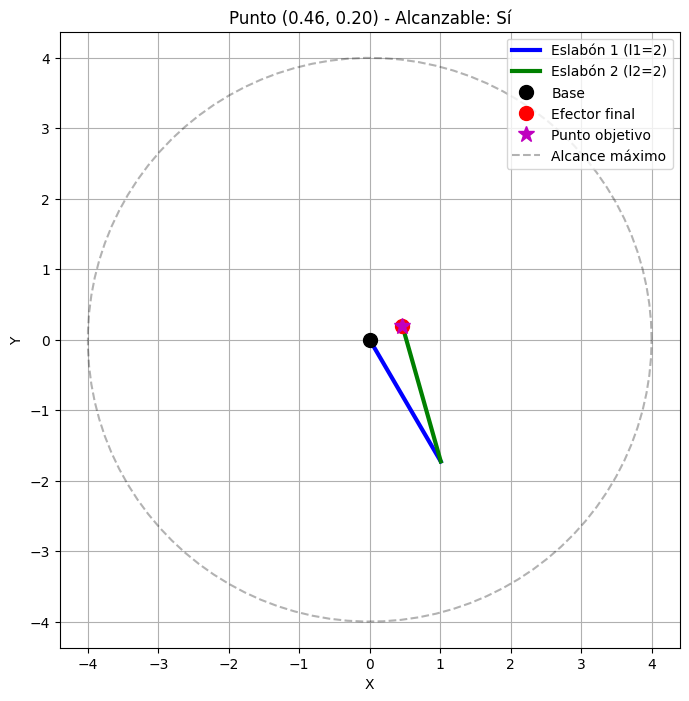


Punto 3: (-0.69, -0.69)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -210.92°, θ₂ = 151.84°
Posición alcanzada: x2 = -0.69, y2 = -0.69


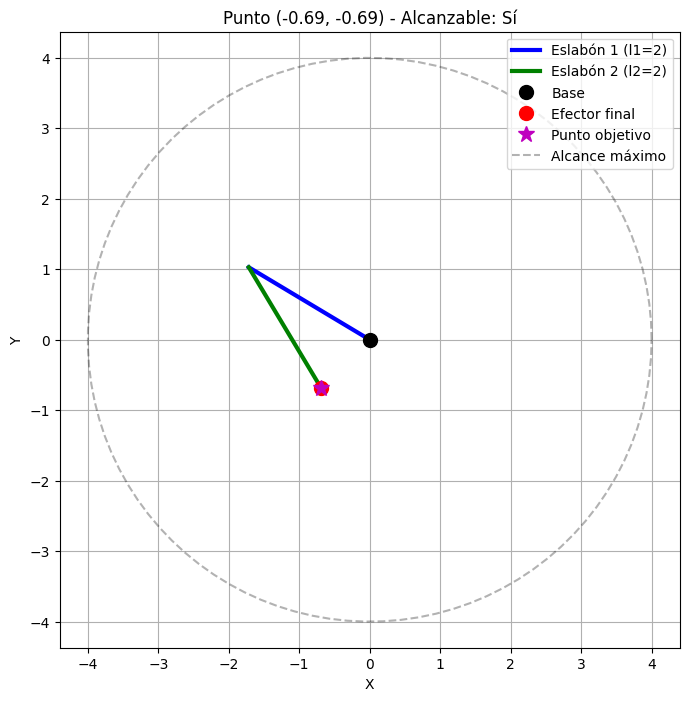


Punto 4: (-0.88, 0.73)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 67.03°, θ₂ = 146.65°
Posición alcanzada: x2 = -0.88, y2 = 0.73


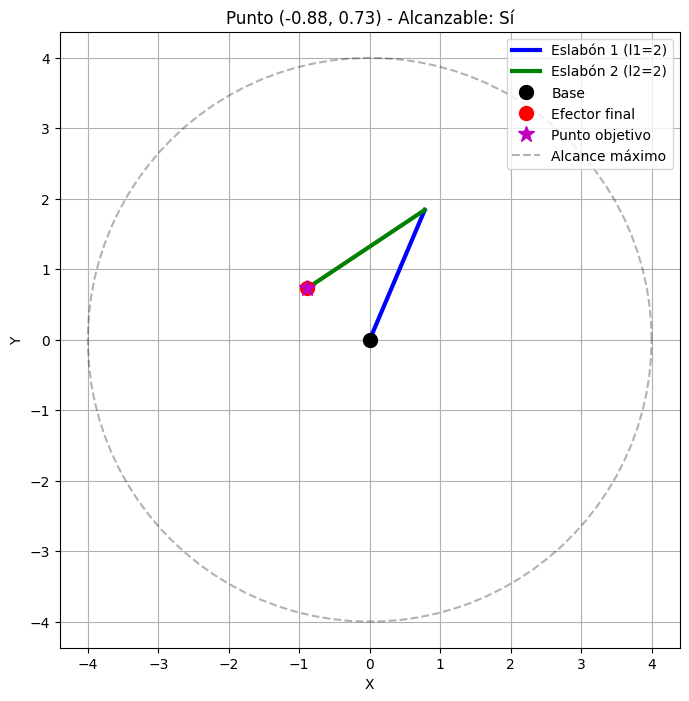


Punto 5: (0.20, 0.42)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -19.28°, θ₂ = 166.72°
Posición alcanzada: x2 = 0.20, y2 = 0.42


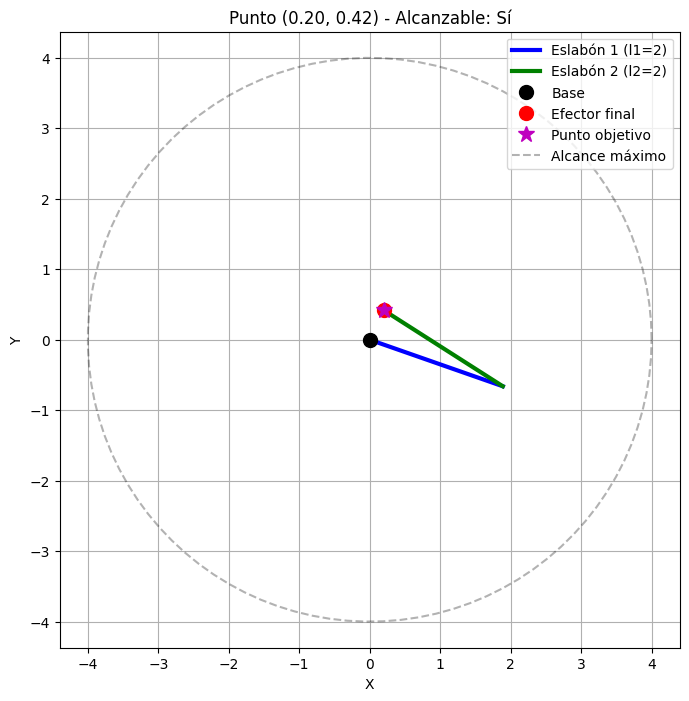


Punto 6: (-0.96, 0.94)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 65.19°, θ₂ = 140.78°
Posición alcanzada: x2 = -0.96, y2 = 0.94


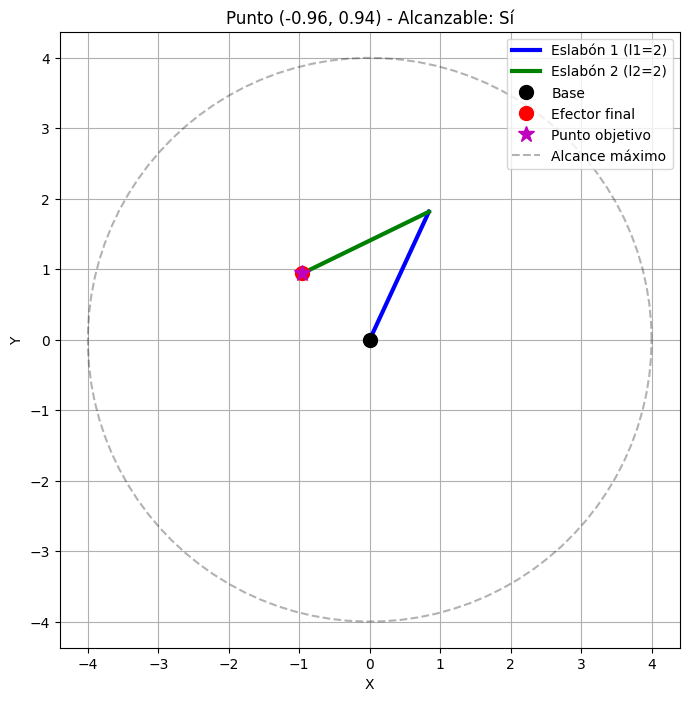


Punto 7: (0.66, -0.58)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -118.17°, θ₂ = 154.60°
Posición alcanzada: x2 = 0.66, y2 = -0.58


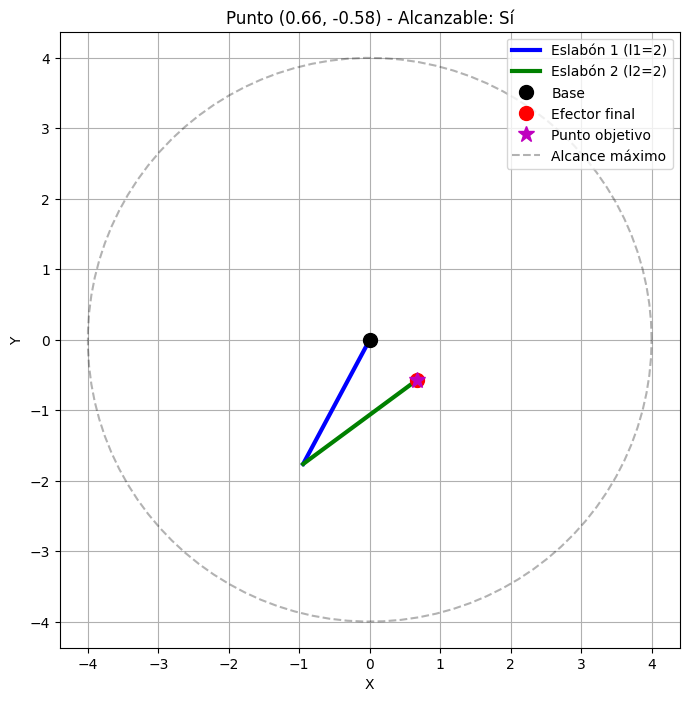


Punto 8: (-0.64, -0.63)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -212.17°, θ₂ = 154.06°
Posición alcanzada: x2 = -0.64, y2 = -0.63


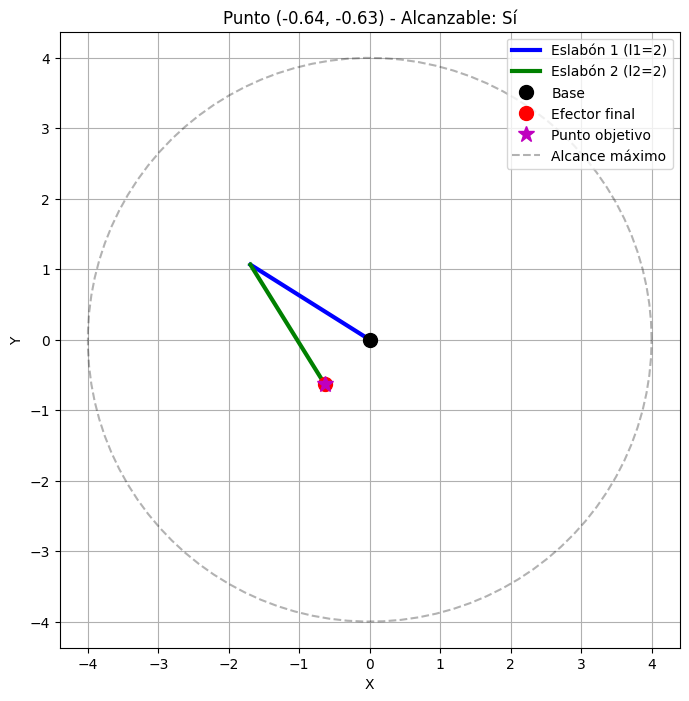


Punto 9: (-0.39, 0.05)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 88.45°, θ₂ = 168.68°
Posición alcanzada: x2 = -0.39, y2 = 0.05


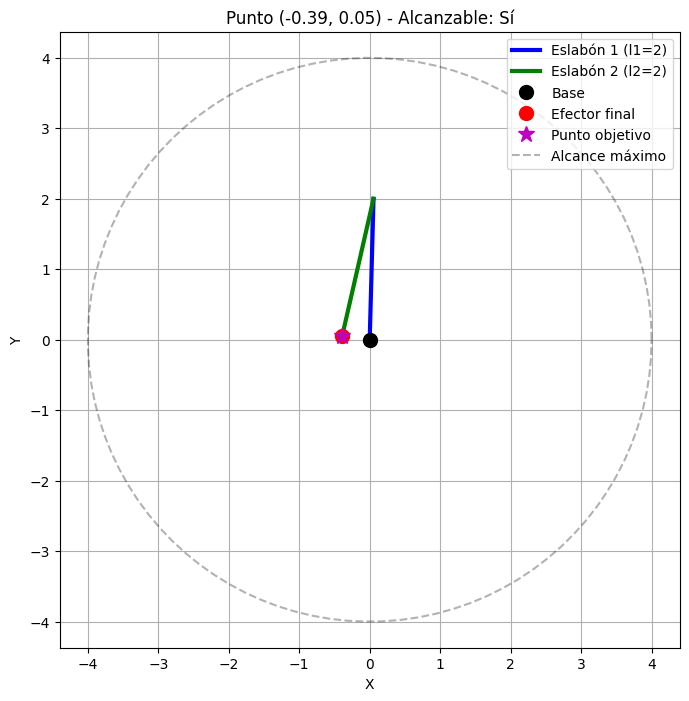


Punto 10: (-0.14, -0.42)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -191.75°, θ₂ = 167.39°
Posición alcanzada: x2 = -0.14, y2 = -0.42


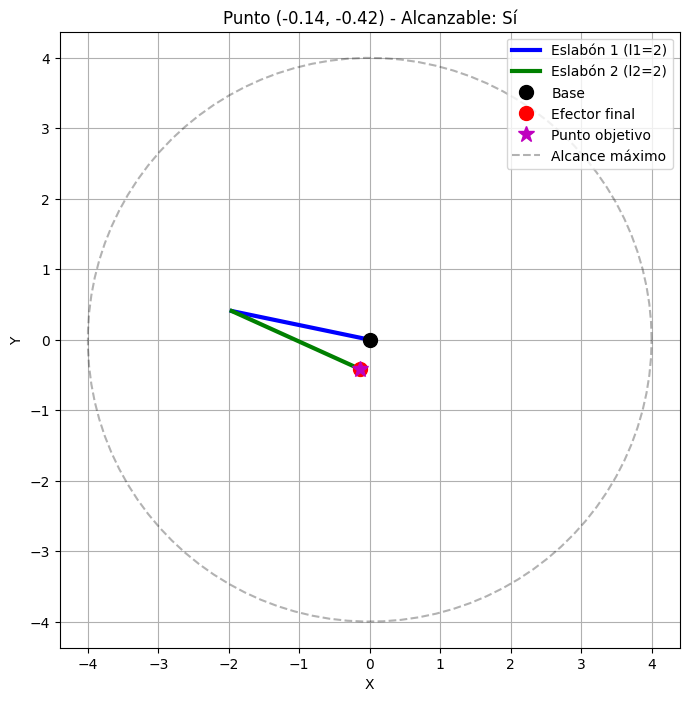


Punto 11: (0.22, -0.72)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -151.88°, θ₂ = 158.24°
Posición alcanzada: x2 = 0.22, y2 = -0.72


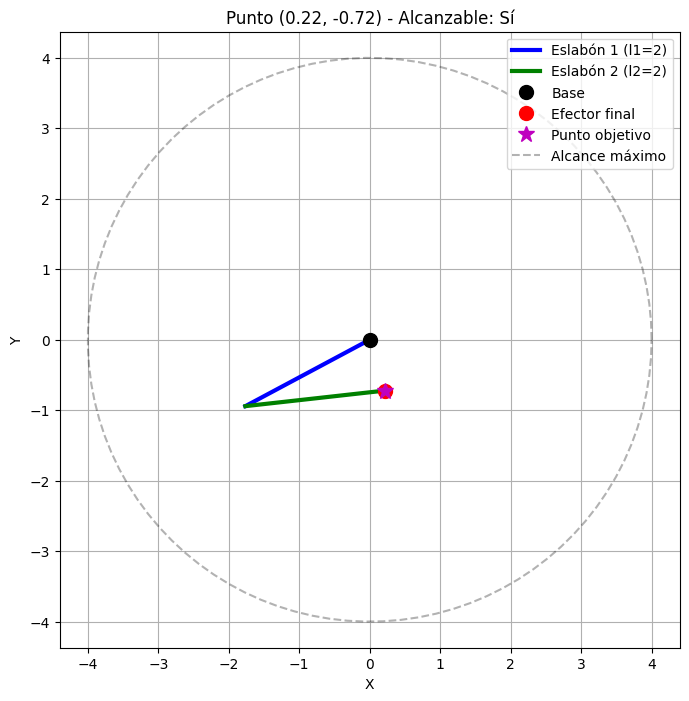


Punto 12: (-0.42, -0.27)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -230.16°, θ₂ = 165.81°
Posición alcanzada: x2 = -0.42, y2 = -0.27


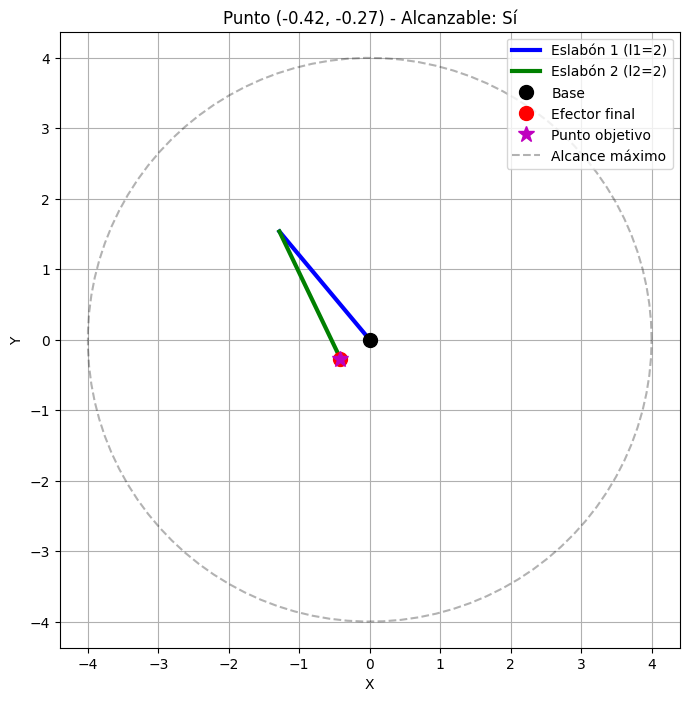


Punto 13: (-0.09, 0.57)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 17.05°, θ₂ = 163.41°
Posición alcanzada: x2 = -0.09, y2 = 0.57


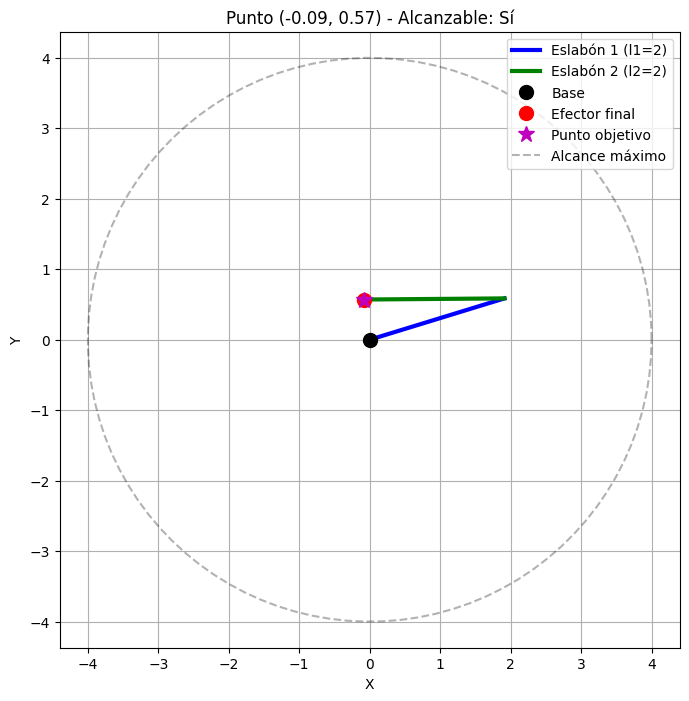


Punto 14: (-0.60, 0.03)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 95.93°, θ₂ = 162.71°
Posición alcanzada: x2 = -0.60, y2 = 0.03


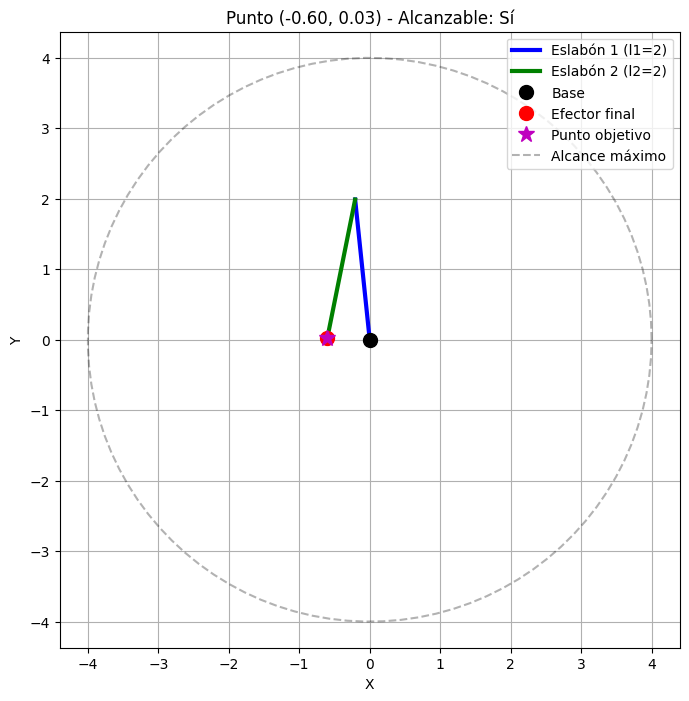


Punto 15: (0.18, -0.91)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -155.10°, θ₂ = 153.24°
Posición alcanzada: x2 = 0.18, y2 = -0.91


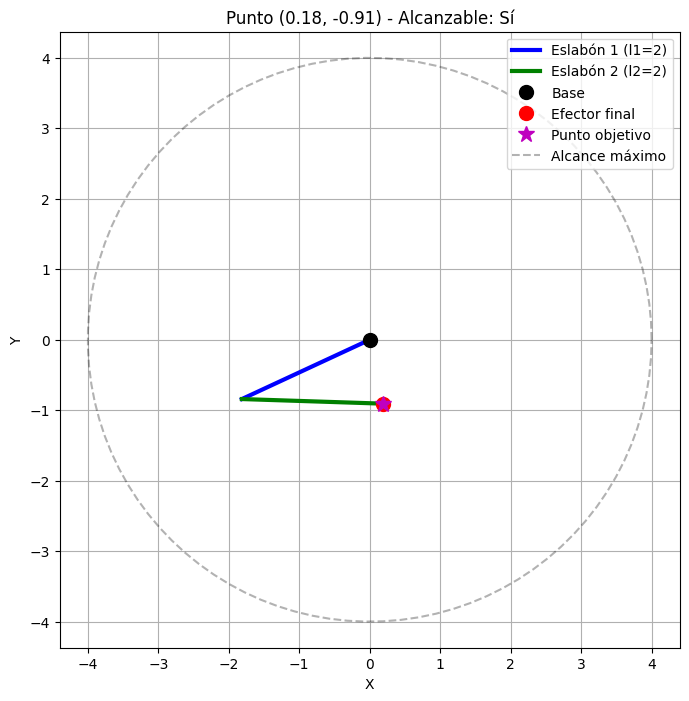


Punto 16: (0.22, -0.66)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -151.94°, θ₂ = 160.04°
Posición alcanzada: x2 = 0.22, y2 = -0.66


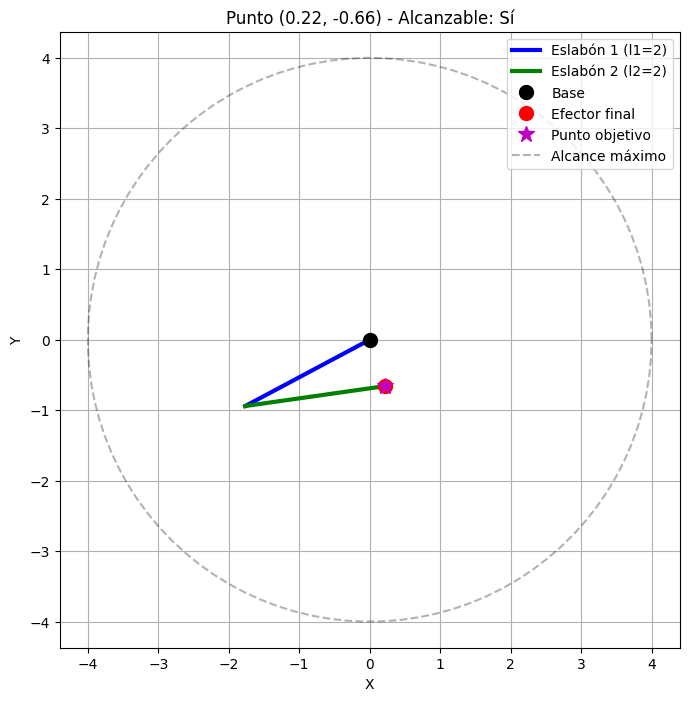


Punto 17: (-0.87, 0.90)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 62.31°, θ₂ = 143.58°
Posición alcanzada: x2 = -0.87, y2 = 0.90


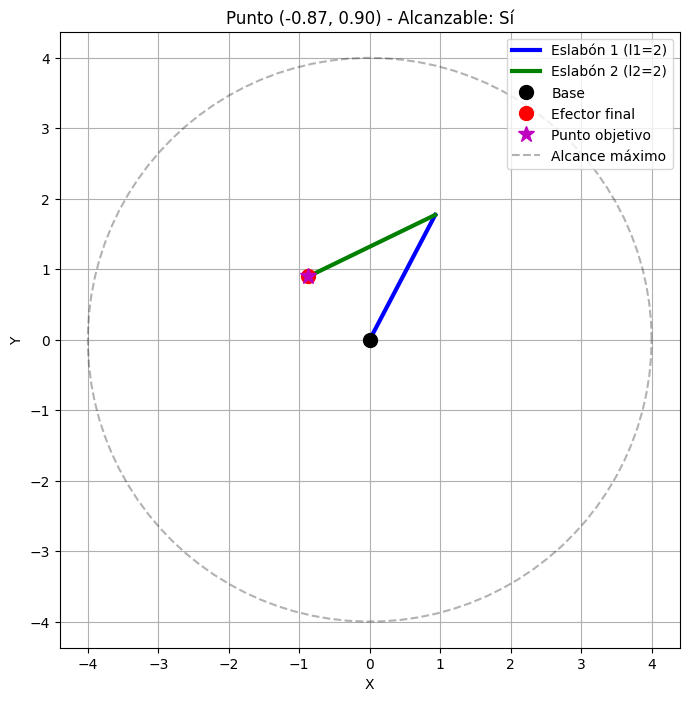


Punto 18: (0.93, 0.62)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -40.27°, θ₂ = 147.57°
Posición alcanzada: x2 = 0.93, y2 = 0.62


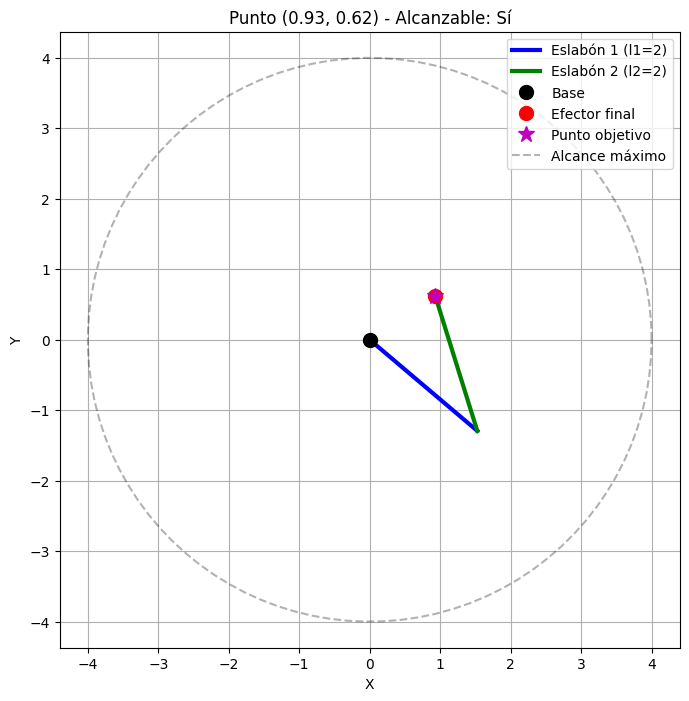


Punto 19: (-0.39, -0.80)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -192.98°, θ₂ = 154.16°
Posición alcanzada: x2 = -0.39, y2 = -0.80


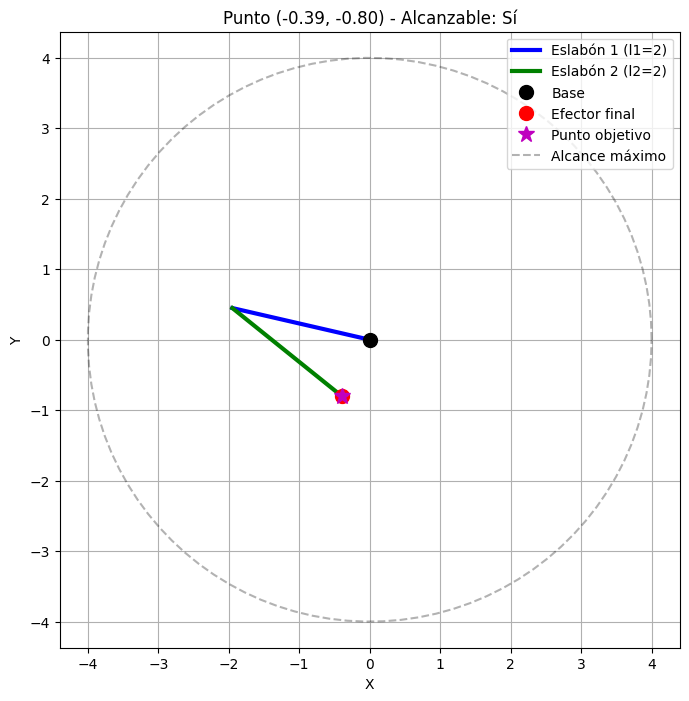


Punto 20: (0.37, -0.12)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -102.44°, θ₂ = 168.88°
Posición alcanzada: x2 = 0.37, y2 = -0.12


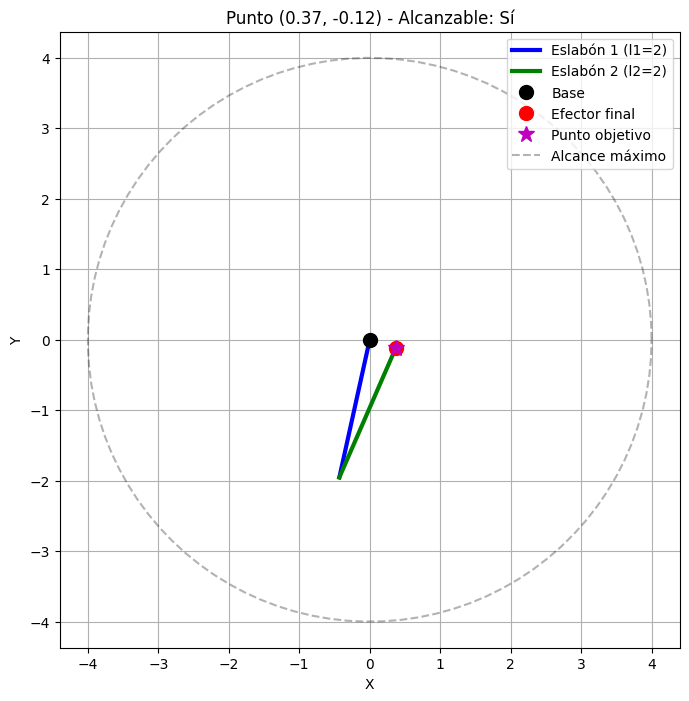


Punto 21: (-0.76, -0.01)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -258.37°, θ₂ = 158.21°
Posición alcanzada: x2 = -0.76, y2 = -0.01


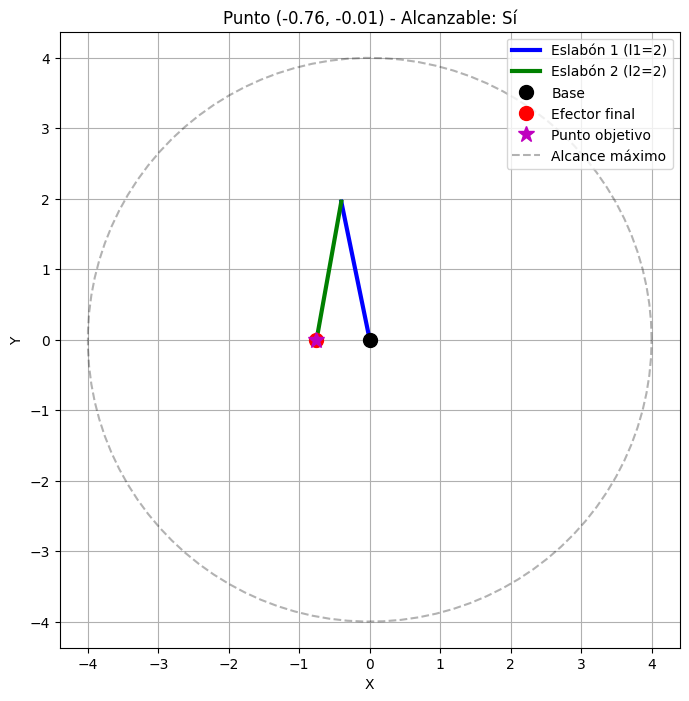


Punto 22: (-0.93, 0.82)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 66.74°, θ₂ = 143.88°
Posición alcanzada: x2 = -0.93, y2 = 0.82


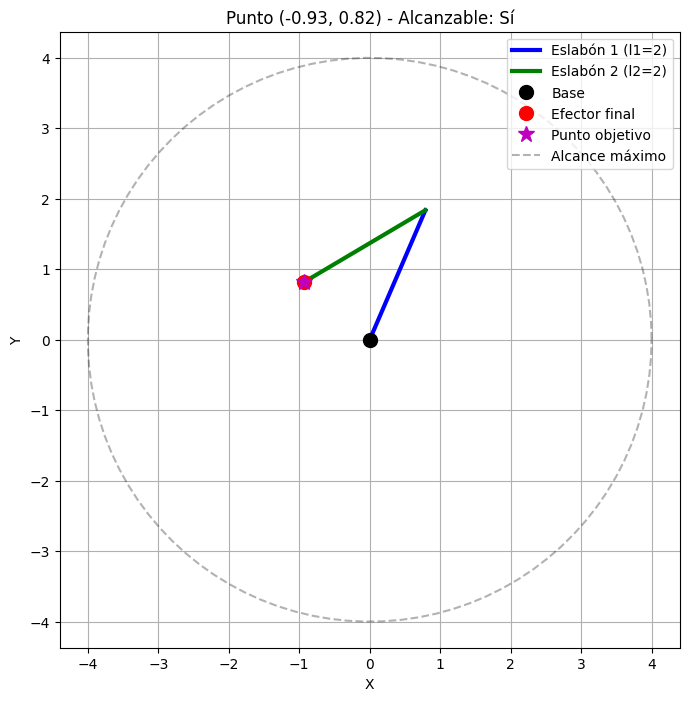


Punto 23: (-0.48, 0.33)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 64.39°, θ₂ = 163.28°
Posición alcanzada: x2 = -0.48, y2 = 0.33


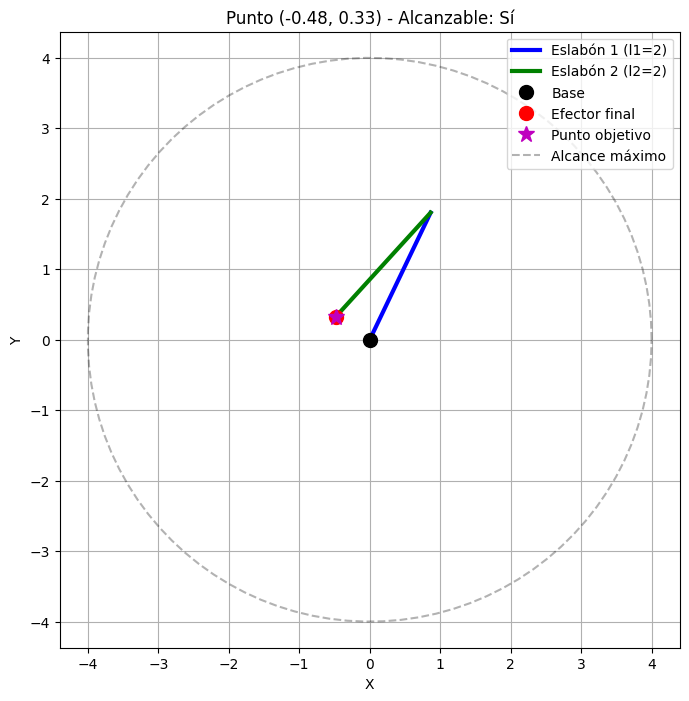


Punto 24: (-0.38, 0.04)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = 89.35°, θ₂ = 169.13°
Posición alcanzada: x2 = -0.38, y2 = 0.04


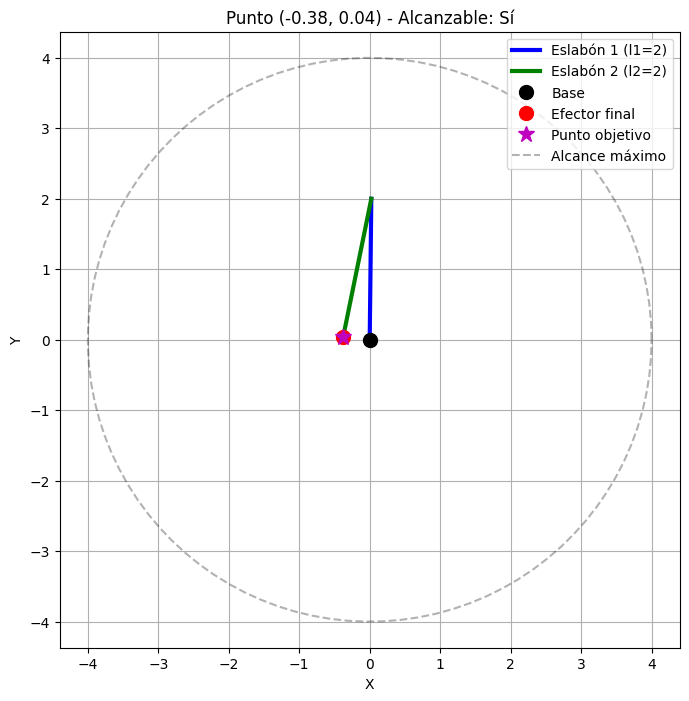


Punto 25: (0.09, -0.63)
¿Es alcanzable? Sí
Ángulos solución: θ₁ = -162.40°, θ₂ = 161.67°
Posición alcanzada: x2 = 0.09, y2 = -0.63


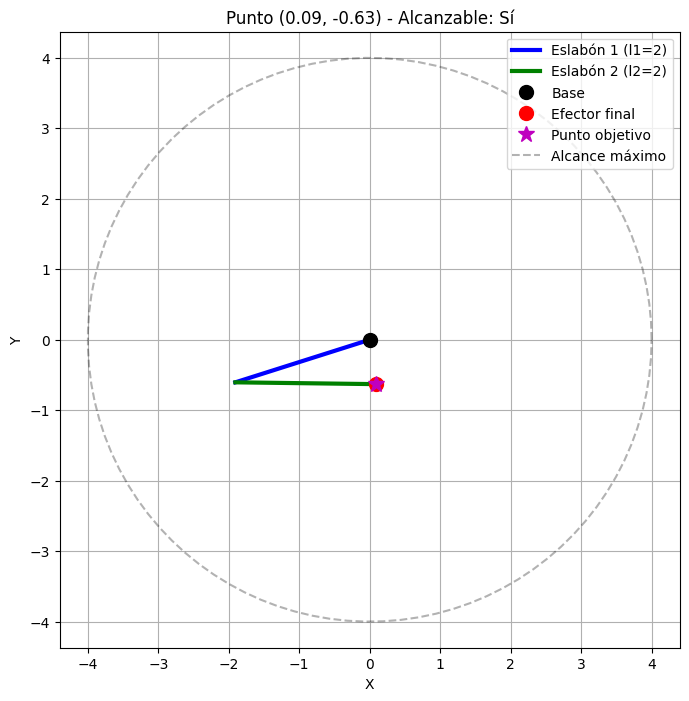

In [ ]:
# Parámetros del brazo robótico
l1, l2 = 2, 2
"""
   Parámetros iniciales del brazo
El brazo robótico está compuesto por dos eslabones que pueden rotar para alcanzar diferentes posiciones en el espacio.
- l1: Longitud del primer eslabón. Representa la distancia desde la base del brazo hasta la primera articulación.
- l2: Longitud del segundo eslabón. Es la distancia entre la primera articulación y el efector final.
Estos valores son esenciales para determinar el alcance máximo y mínimo del brazo.
"""

# Generar puntos aleatorios en una cuadrícula 2x2
np.random.seed(42)  # Para reproducibilidad
puntos = np.random.uniform(-1, 1, (5**2, 2))
"""
    Generación de puntos aleatorios
Se define un espacio de trabajo de 2x2 en el cual se generan puntos aleatorios como objetivos para el brazo robótico.
- np.random.uniform(-1, 1, (5**2, 2)): Genera coordenadas (x, y) aleatorias en un rango definido [-1, 1] para ambos ejes.
    - El tamaño 5**2 indica que se generarán 25 puntos (distribuidos como una cuadrícula).
- np.random.seed(42): Establece una semilla para que los números aleatorios generados sean consistentes cada vez que se ejecute el código.
Esto ayuda en pruebas y depuración.
"""

# Iterar sobre los puntos generados
for i, (x_objetivo, y_objetivo) in enumerate(puntos):
    print(f"\nPunto {i+1}: ({x_objetivo:.2f}, {y_objetivo:.2f})")
    """
       Iteración sobre los puntos
    El ciclo for recorre cada uno de los puntos generados:
    - enumerate(puntos): Permite acceder al índice del punto (i) y sus coordenadas (x_objetivo, y_objetivo).
    - Cada iteración representa un intento del brazo por verificar si puede alcanzar un punto objetivo específico dentro del espacio de trabajo.
    """

    # Verificar si el punto es alcanzable
    distancia = np.sqrt(x_objetivo**2 + y_objetivo**2)
    alcanzable = (distancia <= l1 + l2) and (distancia >= abs(l1 - l2))
    print(f"¿Es alcanzable? {'Sí' if alcanzable else 'No'}")
    """
         Verificación de accesibilidad
    - distancia: Se calcula usando la fórmula de distancia euclidiana, que mide la distancia entre la base del brazo (origen) y el punto objetivo.
        - Fórmula: `distancia = √(x² + y²)`
    - alcanzable: Determina si el punto está dentro del espacio de trabajo del brazo.
        - Condición 1: `distancia <= l1 + l2` (alcance máximo, cuando los eslabones están completamente extendidos).
        - Condición 2: `distancia >= abs(l1 - l2)` (alcance mínimo, cuando los eslabones están completamente colapsados).
    """

    if alcanzable:
        # Cálculo de la cinemática inversa
        prueba_theta2 = (x_objetivo**2 + y_objetivo**2 - l1**2 - l2**2) / (2 * l1 * l2)
        prueba_theta2 = np.clip(prueba_theta2, -1, 1)  # Evitar errores numéricos
        theta2 = np.arccos(prueba_theta2)
        """
             Cinemática inversa: Cálculo del ángulo θ₂
        - Cinemática inversa: Descompone el problema de posicionamiento en ángulos que permitan al brazo alcanzar el punto objetivo.
        - Fórmula para θ₂: Basada en la ley de los cosenos.
            - (x² + y² - l1² - l2²) / (2 * l1 * l2): Calcula la relación entre los lados del triángulo formado por los eslabones y el vector al punto.
        - np.clip: Garantiza que el valor esté dentro del rango [-1, 1] para evitar errores al calcular el coseno inverso (np.arccos).
        """

        k1 = l1 + l2 * np.cos(theta2)
        k2 = l2 * np.sin(theta2)
        theta1 = np.arctan2(y_objetivo, x_objetivo) - np.arctan2(k2, k1)
        """
        ### Cinemática inversa: Cálculo del ángulo θ₁
        - θ₁: Representa el ángulo del primer eslabón del brazo que alinea el primer eslabón hacia el punto objetivo.
        - np.arctan2: Calcula el ángulo con precisión y evita ambigüedades al determinar cuadrantes.
        - k1 y k2: Son componentes auxiliares que representan la proyección horizontal y vertical del segundo eslabón.
        """

        # Cálculo de la posición del efector final
        x1 = l1 * np.cos(theta1)
        y1 = l1 * np.sin(theta1)
        x2 = x1 + l2 * np.cos(theta1 + theta2)
        y2 = y1 + l2 * np.sin(theta1 + theta2)
        """
            Cinemática directa
        - Se calculan las posiciones intermedias y finales del brazo:
            - (x1, y1): Coordenadas del extremo del primer eslabón (calculadas a partir de θ₁).
            - (x2, y2): Coordenadas del efector final, considerando ambos ángulos (θ₁ + θ₂).
        - Esto permite verificar si la posición calculada coincide con el punto objetivo.
        """

        print(f"Ángulos solución: θ₁ = {np.rad2deg(theta1):.2f}°, θ₂ = {np.rad2deg(theta2):.2f}°")
        print(f"Posición alcanzada: x2 = {x2:.2f}, y2 = {y2:.2f}")

        # Graficar el brazo
        plt.figure(figsize=(8, 8))
        plt.plot([0, x1], [0, y1], 'b-', linewidth=3, label=f'Eslabón 1 (l1={l1})')
        plt.plot([x1, x2], [y1, y2], 'g-', linewidth=3, label=f'Eslabón 2 (l2={l2})')
        plt.plot(0, 0, 'ko', markersize=10, label='Base')
        plt.plot(x2, y2, 'ro', markersize=10, label='Efector final')
        plt.plot(x_objetivo, y_objetivo, 'm*', markersize=12, label='Punto objetivo')
        """
         Graficación del brazo robótico
        - Cada eslabón del brazo se representa como una línea conectada entre dos puntos:
            - Base (0, 0) -> (x1, y1): Primer eslabón.
            - (x1, y1) -> (x2, y2): Segundo eslabón.
        - Se destacan elementos importantes:
            - Base: En negro ('ko').
            - Efector final: En rojo ('ro').
            - Punto objetivo: En magenta ('m*').
        """

        # Límites del espacio de trabajo
        theta = np.linspace(0, 2 * np.pi, 100)
        plt.plot((l1 + l2) * np.cos(theta), (l1 + l2) * np.sin(theta), 'k--', alpha=0.3, label='Alcance máximo')
        if l1 != l2:
            plt.plot(abs(l1 - l2) * np.cos(theta), abs(l1 - l2) * np.sin(theta), 'k--', alpha=0.3, label='Alcance mínimo')
        """
             Espacio de trabajo
        - Alcance máximo: Define el límite externo alcanzable por el brazo cuando los eslabones están completamente extendidos.
        - Alcance mínimo: Define el límite interno que el brazo no puede superar debido a la longitud mínima entre los eslabones.
        - Ambas curvas se grafican para visualizar el espacio de trabajo del brazo.
        """

        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Punto ({x_objetivo:.2f}, {y_objetivo:.2f}) - Alcanzable: Sí')
        plt.grid(True)
        plt.legend(loc='upper right')
        plt.axis('equal')
        plt.show()
    else:
        print("El punto no es alcanzable.")